
Question:

What is the infrared sky background in the K band for a fiber?

See Zur (1991)


Following equations from Zir

In [6]:
import numpy as np
%matplotlib inline
from pylab import *

import scipy.integrate

from collections import namedtuple

In [7]:
def Wbb(temp, lam_meter):

    
    h = 6.62e-34 # J s
    k = 1.38e-23 # J/K
    c = 3e8 # m/s
    
    denom = np.exp(h*c/(lam_meter * k * temp) - 1)
    
    return 2*np.pi*h*c**2/lam_meter**5*1/denom

def skewness(gamma, theta, n_core=1.516, n_clad=1.501):
    
    theta_crit = np.arccos(n_clad/n_core)
    
    cgst = np.cos(gamma) * np.sin(theta)
    stc = np.sin(theta_crit)
    
    if cgst <= stc:
        term = 1
    else:
        term = 0
    
    return np.cos(gamma * term)**2



def guided_radiation_factor(n_core=1.516, n_clad=1.501):
    
    def _integrand(gamma_, theta_):    
        return cos(theta_) * sin(theta_) * skewness(gamma_, theta_, n_core, n_clad)
    
    options={'limit':100}
    II = scipy.integrate.nquad(_integrand, [[0,np.pi/2.], [0,np.pi/2.]], opts=[options, options])
    
    return II[0]


GRF = guided_radiation_factor()

def Pbb(temp, lam_, a_meter, GRF):
    
    return 8 * a_meter**2 * Wbb(temp, lam_) * GRF

def emissivity(delta_x_meter, db_per_km):
    
    return 10**(db_per_km/10. * delta_x_meter/1000.) - 1

/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


In [8]:
hc = 1.98e-25 # Joule meter
k = 1.38e-23 # J/K


T = 21.5 + 273 # K
lam = 2.35e-6 # meter
d_fiber = 100e-6 # meter

fiber_length = 30 #m
fiber_db_km = 5 

epp = hc/lam

watt_micron = Pbb(T, lam, d_fiber, GRF) * emissivity(fiber_length, fiber_db_km)

meter_to_ang = 1e10
print(watt_micron/epp/meter_to_ang)

29123.6726847


In [9]:
gs = np.arange(0,6,.01)
fs = [skewness(g, np.pi/2, 1.516, 1.501) for g in gs]

emissivity(3, 5) # Watt / micron


0.0034598491478392557

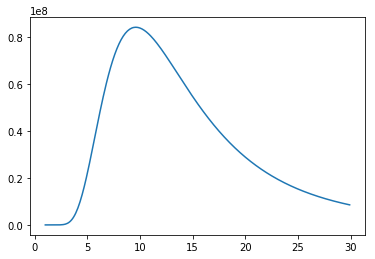

In [10]:
lam = np.arange(1e-6,30e-6,1e-7)
plot(lam*1e6, Wbb(300, lam))

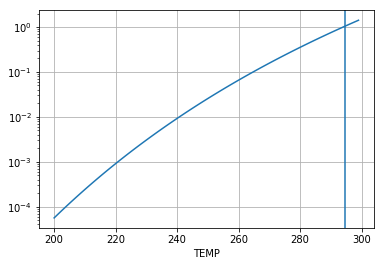

In [11]:
ts = np.arange(200, 300, 1)
ws = [Wbb(t, 2.35e-6) for t in ts]
normat = np.argmin(np.abs(ts-(273+21.5)))

semilogy(ts,ws/ws[normat])
axvline(273+21.5)
xlabel("TEMP")
grid(True)

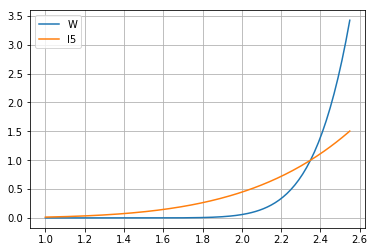

In [12]:
ls = np.arange(1e-6, 2.55e-6, 1e-8)
ws = [Wbb(293, l) for l in ls]
normat = np.argmin(np.abs(ls-(2.35e-6)))

l5 = ls**5

plot(ls*1e6,ws/ws[normat])
plot(ls*1e6,l5/l5[normat])

legend(["W","l5"])
grid(True)